<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day16_Resume_Keyword_Matcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept:**

Text similarity and information extraction

**By building this tool, we're creating a practical application of AI that addresses real challenges in hiring and career development, while learning important NLP concepts that can be applied to many other text-matching problems.**

**Setting Up Our Environment**

In [4]:
# Install required libraries
!pip install nltk scikit-learn spacy pandas matplotlib seaborn
!python -m spacy download en_core_web_sm

# Import libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' data package
nltk.download('punkt_tab') # This line was added to fix the error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Preparing Sample Data**

In [2]:
# Sample job descriptions
job_descriptions = {
    "Data Scientist": """
    Requirements:
    - 3+ years experience in data science
    - Proficient in Python, R, and SQL
    - Experience with machine learning frameworks (TensorFlow, PyTorch, scikit-learn)
    - Strong background in statistics and mathematics
    - Experience with data visualization tools (Tableau, PowerBI)
    - Excellent communication skills
    """,

    "Frontend Developer": """
    Requirements:
    - 2+ years experience in frontend development
    - Strong knowledge of HTML, CSS, and JavaScript
    - Experience with React, Angular, or Vue.js
    - Understanding of responsive design principles
    - Knowledge of version control systems (Git)
    - Experience with UI/UX design principles
    """
}

# Sample resumes
resumes = {
    "Candidate A": """
    JOHN DOE
    Data Professional

    Experience:
    - Data Analyst, ABC Company (2019-2022)
      * Developed models using Python and scikit-learn
      * Created dashboards with Tableau
      * Worked with SQL databases

    Education:
    - M.S. in Data Science, Tech University (2019)

    Skills:
    - Programming: Python, R, SQL
    - Tools: Jupyter, Git, Tableau
    - Machine Learning: Regression, Classification
    """,

    "Candidate B": """
    JANE SMITH
    Web Developer

    Experience:
    - Frontend Developer, XYZ Corp (2020-2022)
      * Built responsive websites using HTML, CSS, JavaScript
      * Developed components with React
      * Collaborated with designers on UI/UX improvements

    Education:
    - B.S. in Computer Science, State University (2020)

    Skills:
    - Frontend: HTML, CSS, JavaScript, React
    - Tools: VS Code, Git, Figma
    - Other: Responsive design, Web accessibility
    """
}

**Text Preprocessing Functions**

In [5]:
def preprocess_text(text):
    """Clean and preprocess text data"""
    # Load spaCy model
    nlp = spacy.load('en_core_web_sm')

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', ' ', text)

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [w for w in tokens if w not in stop_words and len(w) > 1]

    # Return preprocessed text
    return ' '.join(filtered_tokens)

# Process all our documents
processed_jobs = {title: preprocess_text(desc) for title, desc in job_descriptions.items()}
processed_resumes = {name: preprocess_text(resume) for name, resume in resumes.items()}

**Extract Keywords from Job Descriptions**

In [6]:
def extract_keywords(text):
    """Extract important keywords from text using spaCy"""
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)

    # Extract nouns and proper nouns
    keywords = []
    for token in doc:
        if token.pos_ in ['NOUN', 'PROPN'] and len(token.text) > 1:
            keywords.append(token.text)

    # Extract noun phrases (like "machine learning" or "data science")
    for chunk in doc.noun_chunks:
        if len(chunk.text.split()) > 1:  # Only multi-word phrases
            keywords.append(chunk.text)

    return list(set(keywords))  # Remove duplicates

# Extract keywords from job descriptions
job_keywords = {title: extract_keywords(desc) for title, desc in job_descriptions.items()}

# Display the extracted keywords
for job, keywords in job_keywords.items():
    print(f"Keywords for {job}:")
    print(', '.join(keywords))
    print()

Keywords for Data Scientist:
statistics, learning, Experience, scikit, machine, data visualization tools, experience, mathematics
    - Experience, PyTorch, data, science, SQL, mathematics, TensorFlow, visualization, PowerBI, Requirements, data science
    - Proficient, communication, Python, SQL
    - Experience, tools, Proficient, skills, frameworks, background, )
    - Excellent communication skills, years, 
    Requirements:
    - 3+ years experience, Tableau

Keywords for Frontend Developer:
JavaScript, principles, Experience, JavaScript
    - Experience, Git, experience, HTML, UX, frontend development
    - Strong knowledge, version control systems, UI, Knowledge, Vue.js
    - Understanding, version, systems, Angular, Understanding, development, Requirements, Vue.js, knowledge, responsive design principles
    - Knowledge, 
    Requirements:
    - 2+ years experience, (Git)
    - Experience, frontend, CSS, UI/UX design principles, control, design, years, React



**Calculate Similarity Scores**

In [7]:
def calculate_similarity(job_desc, resume):
    """Calculate similarity between job description and resume using TF-IDF"""
    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Calculate TF-IDF representations
    tfidf_matrix = vectorizer.fit_transform([job_desc, resume])

    # Calculate cosine similarity
    similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

    return similarity * 100  # Convert to percentage

# Calculate similarity for each resume-job pair
results = {}
for job_title, job_text in processed_jobs.items():
    job_results = {}
    for candidate, resume_text in processed_resumes.items():
        similarity = calculate_similarity(job_text, resume_text)
        job_results[candidate] = similarity
    results[job_title] = job_results

# Display results
for job, candidates in results.items():
    print(f"Match results for {job}:")
    for candidate, score in candidates.items():
        print(f"  {candidate}: {score:.1f}%")
    print()

Match results for Data Scientist:
  Candidate A: 36.8%
  Candidate B: 7.2%

Match results for Frontend Developer:
  Candidate A: 4.8%
  Candidate B: 27.3%



**Detailed Keyword Matching**

In [8]:
def check_keyword_presence(keywords, resume):
    """Check which keywords from the job description are present in the resume"""
    resume_lower = resume.lower()
    matched = []
    missing = []

    for keyword in keywords:
        if keyword.lower() in resume_lower:
            matched.append(keyword)
        else:
            missing.append(keyword)

    return {
        'matched': matched,
        'missing': missing,
        'match_rate': len(matched) / len(keywords) * 100 if keywords else 0
    }

# Check keyword matches for each resume-job pair
keyword_matches = {}
for job_title, keywords in job_keywords.items():
    job_matches = {}
    for candidate, resume in resumes.items():
        job_matches[candidate] = check_keyword_presence(keywords, resume)
    keyword_matches[job_title] = job_matches

# Display keyword matching results
for job, candidates in keyword_matches.items():
    print(f"Keyword matches for {job}:")
    for candidate, matches in candidates.items():
        print(f"  {candidate}:")
        print(f"    Match rate: {matches['match_rate']:.1f}%")
        print(f"    Matched keywords: {', '.join(matches['matched'])}")
        print(f"    Missing keywords: {', '.join(matches['missing'])}")
        print()

Keyword matches for Data Scientist:
  Candidate A:
    Match rate: 40.0%
    Matched keywords: learning, Experience, scikit, machine, experience, data, science, SQL, Python, tools, skills, Tableau
    Missing keywords: statistics, data visualization tools, mathematics
    - Experience, PyTorch, mathematics, TensorFlow, visualization, PowerBI, Requirements, data science
    - Proficient, communication, SQL
    - Experience, Proficient, frameworks, background, )
    - Excellent communication skills, years, 
    Requirements:
    - 3+ years experience

  Candidate B:
    Match rate: 16.7%
    Matched keywords: Experience, experience, science, tools, skills
    Missing keywords: statistics, learning, scikit, machine, data visualization tools, mathematics
    - Experience, PyTorch, data, SQL, mathematics, TensorFlow, visualization, PowerBI, Requirements, data science
    - Proficient, communication, Python, SQL
    - Experience, Proficient, frameworks, background, )
    - Excellent communic

**Visualize the Results**

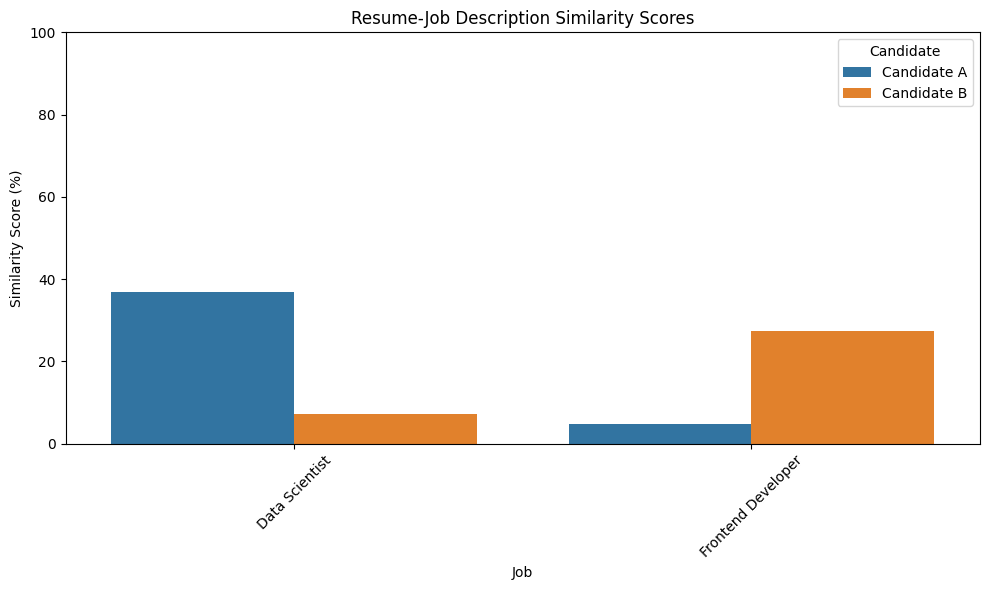

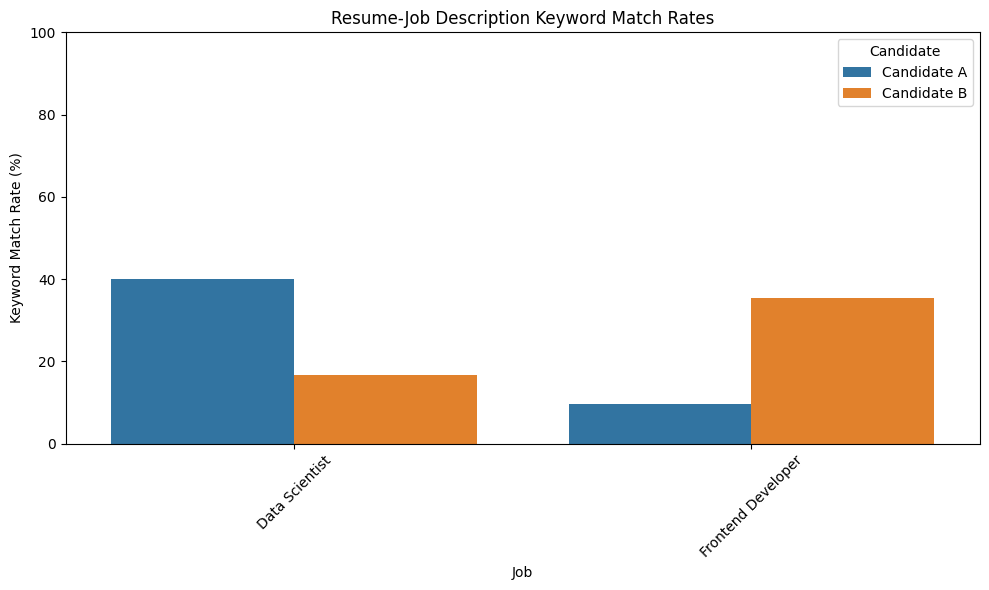

In [11]:
import matplotlib.pyplot as plt  # Import pyplot
# Create a bar chart of overall similarity scores
def plot_similarity_scores(results):
    """Plot similarity scores for all job-candidate pairs"""
    # Prepare data for plotting
    data = []
    for job, candidates in results.items():
        for candidate, score in candidates.items():
            data.append({
                'Job': job,
                'Candidate': candidate,
                'Similarity Score': score
            })

    df = pd.DataFrame(data)

    # Create plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Job', y='Similarity Score', hue='Candidate', data=df)
    plt.title('Resume-Job Description Similarity Scores')
    plt.ylabel('Similarity Score (%)')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create visualization for keyword match rates
def plot_keyword_match_rates(keyword_matches):
    """Plot keyword match rates for all job-candidate pairs"""
    # Prepare data for plotting
    data = []
    for job, candidates in keyword_matches.items():
        for candidate, matches in candidates.items():
            data.append({
                'Job': job,
                'Candidate': candidate,
                'Keyword Match Rate': matches['match_rate']
            })

    df = pd.DataFrame(data)

    # Create plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Job', y='Keyword Match Rate', hue='Candidate', data=df)
    plt.title('Resume-Job Description Keyword Match Rates')
    plt.ylabel('Keyword Match Rate (%)')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Generate visualizations
plot_similarity_scores(results)
plot_keyword_match_rates(keyword_matches)

**Generate Summary Reports**

In [12]:
def generate_report(candidate, job_title, similarity_score, keyword_matches):
    """Generate a comprehensive report for a candidate"""
    matched = keyword_matches['matched']
    missing = keyword_matches['missing']
    match_rate = keyword_matches['match_rate']

    print(f"Resume Match Report: {candidate} for {job_title}")
    print("=" * 50)
    print(f"Overall Similarity Score: {similarity_score:.1f}%")
    print(f"Keyword Match Rate: {match_rate:.1f}%")
    print()

    print("Strengths (Matched Keywords):")
    for keyword in matched:
        print(f"- {keyword}")
    print()

    print("Gaps (Missing Keywords):")
    for keyword in missing:
        print(f"- {keyword}")
    print()

    # Generate recommendations
    if similarity_score >= 75:
        recommendation = "Strong match for the position."
    elif similarity_score >= 50:
        recommendation = "Good match, but consider highlighting experience in missing keywords."
    else:
        recommendation = "Not a strong match. Significant skills gap for this position."

    print("Recommendation:")
    print(recommendation)
    print("=" * 50)

# Generate reports for each candidate-job pair
for job_title, candidates in keyword_matches.items():
    for candidate, matches in candidates.items():
        similarity_score = results[job_title][candidate]
        generate_report(candidate, job_title, similarity_score, matches)
        print("\n")

Resume Match Report: Candidate A for Data Scientist
Overall Similarity Score: 36.8%
Keyword Match Rate: 40.0%

Strengths (Matched Keywords):
- learning
- Experience
- scikit
- machine
- experience
- data
- science
- SQL
- Python
- tools
- skills
- Tableau

Gaps (Missing Keywords):
- statistics
- data visualization tools
- mathematics
    - Experience
- PyTorch
- mathematics
- TensorFlow
- visualization
- PowerBI
- Requirements
- data science
    - Proficient
- communication
- SQL
    - Experience
- Proficient
- frameworks
- background
- )
    - Excellent communication skills
- years
- 
    Requirements:
    - 3+ years experience

Recommendation:
Not a strong match. Significant skills gap for this position.


Resume Match Report: Candidate B for Data Scientist
Overall Similarity Score: 7.2%
Keyword Match Rate: 16.7%

Strengths (Matched Keywords):
- Experience
- experience
- science
- tools
- skills

Gaps (Missing Keywords):
- statistics
- learning
- scikit
- machine
- data visualization

**Create a Simple User Interface**

In [13]:
def analyze_resume(job_description, resume_text):
    """Analyze a resume against a job description"""
    # Preprocess texts
    proc_job = preprocess_text(job_description)
    proc_resume = preprocess_text(resume_text)

    # Extract keywords from job description
    keywords = extract_keywords(job_description)

    # Calculate similarity
    similarity = calculate_similarity(proc_job, proc_resume)

    # Check keyword presence
    keyword_match = check_keyword_presence(keywords, resume_text)

    # Generate report
    print("Resume Analysis Report")
    print("=" * 50)
    print(f"Overall Similarity Score: {similarity:.1f}%")
    print(f"Keyword Match Rate: {keyword_match['match_rate']:.1f}%")
    print()

    print("Matched Keywords:")
    for keyword in keyword_match['matched']:
        print(f"- {keyword}")
    print()

    print("Missing Keywords:")
    for keyword in keyword_match['missing']:
        print(f"- {keyword}")
    print("=" * 50)

    return {
        'similarity': similarity,
        'keyword_match': keyword_match
    }

# Example usage
new_job = """
Job Title: Data Analyst
Requirements:
- Bachelor's degree in Statistics, Mathematics, or related field
- 2+ years of experience in data analysis
- Proficiency in SQL and Excel
- Experience with data visualization tools (Tableau preferred)
- Strong problem-solving and communication skills
"""

new_resume = """
MICHAEL JOHNSON
Data Professional

Experience:
- Business Analyst, DEF Inc. (2020-2022)
  * Analyzed business metrics using SQL and Excel
  * Created dashboards to visualize KPIs
  * Presented findings to stakeholders

Education:
- B.S. in Business Analytics, University College (2020)

Skills:
- Technical: SQL, Excel, PowerPoint
- Analysis: Data visualization, statistical analysis
- Soft skills: Communication, problem-solving
"""

# Analyze the new resume
analyze_resume(new_job, new_resume)

Resume Analysis Report
Overall Similarity Score: 30.9%
Keyword Match Rate: 40.0%

Matched Keywords:
- Excel
- Experience
- experience
- Data
- data
- SQL
- visualization
- communication
- skills
- Analyst
- analysis
- problem

Missing Keywords:
- Excel
- Experience
- Title
- Data Analyst
Requirements
- data visualization tools
- Job
- Proficiency
- Requirements
- - Bachelor's degree
- Bachelor
- tools
- Statistics
- data analysis
- Proficiency
- Mathematics
- degree
- 
Job Title
- field
- years
- Tableau


{'similarity': np.float64(30.942828038128255),
 'keyword_match': {'matched': ['Excel',
   'Experience',
   'experience',
   'Data',
   'data',
   'SQL',
   'visualization',
   'communication',
   'skills',
   'Analyst',
   'analysis',
   'problem'],
  'missing': ['Excel\n- Experience',
   'Title',
   'Data Analyst\nRequirements',
   'data visualization tools',
   'Job',
   'Proficiency',
   'Requirements',
   "- Bachelor's degree",
   'Bachelor',
   'tools',
   'Statistics',
   'data analysis\n- Proficiency',
   'Mathematics',
   'degree',
   '\nJob Title',
   'field',
   'years',
   'Tableau'],
  'match_rate': 40.0}}